In [14]:
import pandas as pd
import numpy as np
import xlrd
import os 
import matplotlib.pyplot as plt




In [60]:

new_data=[]

carpeta="C:\\Users\\TOSHIBA\\OneDrive\\Documentos\\GESTIÓN\\Upt\\2023-II\\Gerencia y planeamiento\\ROE\\Data"
files=os.listdir(carpeta)

for file in files :

    path=os.path.join(carpeta,file)
    df=pd.read_excel(path,header=None)
    
    
    #ROWS INDEXES
    

    #Getting ROE ROW index
    roe_row = df[df.eq('ROE').any(axis=1)]
    roe_index= roe_row.index[0]

    #Getting ROA ROW index
    roa_row = df[df.eq('ROA').any(axis=1)]
    roa_index= roa_row.index[0]

    #COLUMNS INDEXES
    #Getting Rimac COLUMN index
    rimac_index=df.columns[df.eq("Rímac").any()]
   


    #VALUES

    #roe_value

    roe_value=df.iat[roe_index,rimac_index[0]]

    #roa_value

    roa_value=df.iat[roa_index,rimac_index[0]]


    #Date
    date_value= os.path.basename(file)


    # Crear una nueva lista con los valores actuales
    current_data = [roe_value, roa_value, date_value]

    # Agregar la nueva lista a new_data
    new_data.append(current_data)
    

# Crear un DataFrame
data = pd.DataFrame(new_data, columns=['roe_value', 'roa_value', 'date_time'])

# Imprimir el DataFrame


data

,roe_value,roa_value,date_time
0,11.087745,1.736456,2014aen.XLS
1,12.158453,1.865364,2014bfe.XLS
2,12.513298,1.884246,2014cma.XLS
3,13.344601,1.981575,2014dab.XLS
4,13.424643,1.975599,2014emy.XLS
...,...,...,...
112,16.251984,1.942887,2023emy.XLS
113,16.102419,1.951164,2023fjn.XLS
114,16.322179,2.008106,2023gjl.XLS
115,17.017793,2.120424,2023hag.XLS


In [59]:
data.describe()

,roe_value,roa_value
count,117.000000,117.000000
mean,12.216372,1.613687
std,5.016113,0.678488
min,2.342817,0.301611
25%,9.527810,1.276143
50%,13.480878,1.821553
75%,16.322179,2.102886
max,20.324320,2.715230


In [42]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Seleccionar las columnas a normalizar
columns_to_normalize = ['roe_value', 'roa_value']

# Normalizar los datos
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data


,roe_value,roa_value,date_time
0,-0.225968,0.181723,2014aen.XLS
1,-0.011596,0.372534,2014bfe.XLS
2,0.059449,0.400483,2014cma.XLS
3,0.225888,0.544549,2014dab.XLS
4,0.241914,0.535704,2014emy.XLS
...,...,...,...
112,0.807990,0.487284,2023emy.XLS
113,0.778045,0.499536,2023fjn.XLS
114,0.822044,0.583822,2023gjl.XLS
115,0.961317,0.750074,2023hag.XLS


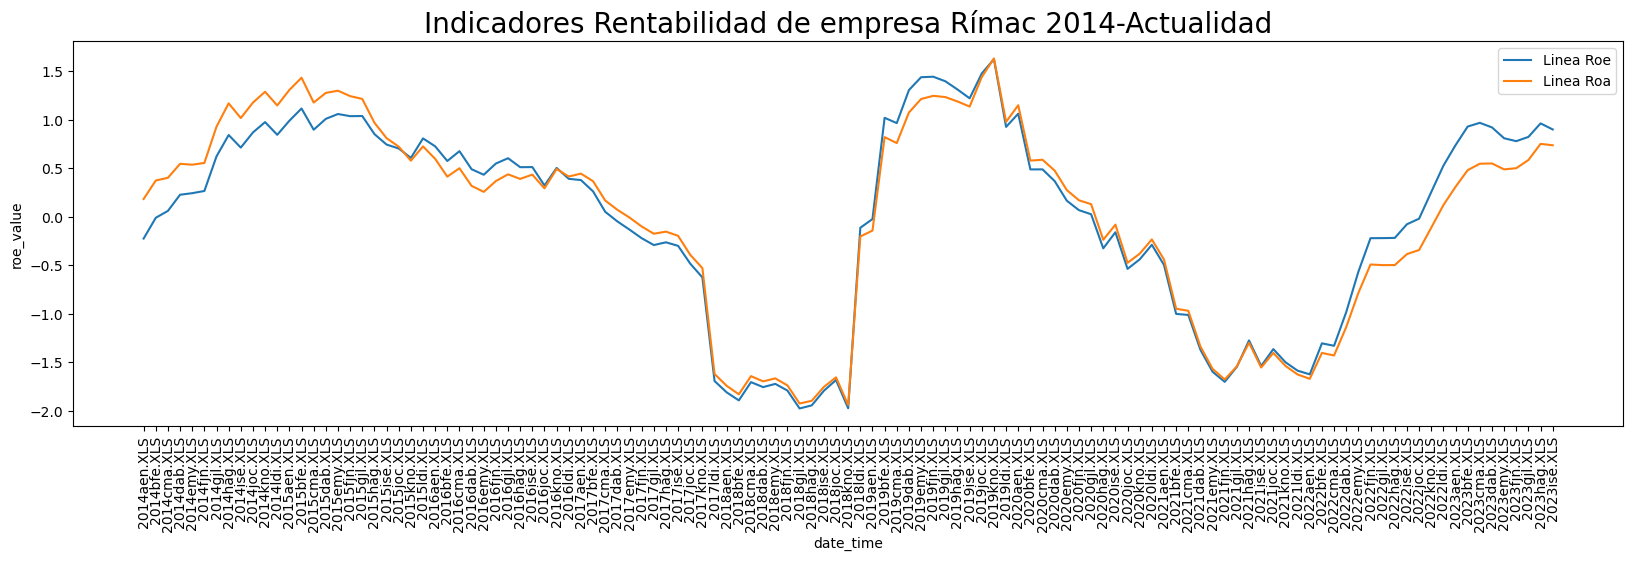

In [54]:
import seaborn as sns
x=data.date_time
y=data.roe_value
y2=data.roa_value
plt.figure(figsize=(20, 5))
plt.title("Indicadores Rentabilidad de empresa Rímac 2014-Actualidad", size=20)

sns.lineplot(x=x, y=y, data=data, label="Linea Roe")
sns.lineplot(x=x, y=y2, data=data, label="Linea Roa")
plt.legend()
plt.xticks(rotation=90)


plt.show()